In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy import stats

In [5]:
from scipy.stats import pearsonr, spearmanr

In [6]:
from pylab import *


In [7]:
import pandas as pd


In [8]:
import statsmodels.api as sm

In [9]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_leverage_resid2

In [12]:
VJCData=pd.read_csv('VJC_Finalised_Data - Data.csv')

AttributeError: module 'matplotlib.pyplot' has no attribute 'spines'

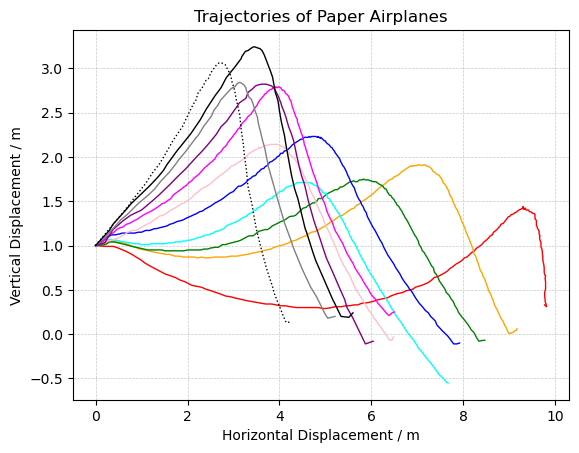

In [15]:
plt.plot(VJCData.Horizontal0_1, VJCData.Vertical0_1, color='red', linestyle='-', linewidth=1)
#plt.plot(VJCData.Horizontal0_2,VJCData.Vertical0_2, color='red', linestyle='-', linewidth=1)
#plt.plot(VJCData.Horizontal0_3, VJCData.Vertical0_3, color='red', linestyle='-', linewidth=1) 
#plt.plot(VJCData.Horizontal0_4, VJCData.Vertical0_4, color='red', linestyle='-', linewidth=1) 
#plt.plot(VJCData.Horizontal0_5, VJCData.Vertical0_5,color='red', linestyle='-', linewidth=1)
#plt.plot(VJCData.Horizontal2_1, VJCData.Vertical2_1, color='red', linestyle='--', linewidth=2) 
#plt.plot( VJCData.Horizontal2_2,VJCData.Vertical2_2, color='red', linestyle='--', linewidth=2) 
#plt.plot( VJCData.Horizontal2_3,VJCData.Vertical2_3, color='red', linestyle='--', linewidth=1) 
#plt.plot( VJCData.Horizontal2_4, VJCData.Vertical2_4,color='red', linestyle='--', linewidth=2) 
#plt.plot(VJCData.Horizontal2_5, VJCData.Vertical2_5, color='red', linestyle='--', linewidth=2) 
plt.plot(VJCData.Horizontal4_5, VJCData.Vertical4_5, color='orange', linestyle='-', linewidth=1)
#plt.plot(VJCData.Horizontal6_5, VJCData.Vertical6_5, color='orange', linestyle='--', linewidth=1)
plt.plot(VJCData.Horizontal8_5, VJCData.Vertical8_5, color='green', linestyle='-', linewidth=1)
#plt.plot(VJCData.Horizontal10_5, VJCData.Vertical10_5, color='green', linestyle='--', linewidth=1)
plt.plot(VJCData.Horizontal12_5, VJCData.Vertical12_5, color='cyan', linestyle='-', linewidth=1)
#plt.plot(VJCData.Horizontal14_5, VJCData.Vertical14_5, color='cyan', linestyle='--', linewidth=1)
plt.plot(VJCData.Horizontal16_2, VJCData.Vertical16_2, color='blue', linestyle='-', linewidth=1)
#plt.plot(VJCData.Horizontal18_5, VJCData.Vertical18_5, color='blue', linestyle='--', linewidth=1)
plt.plot(VJCData.Horizontal20_3, VJCData.Vertical20_3, color='pink', linestyle='-', linewidth=1)
#plt.plot(VJCData.Horizontal22_5, VJCData.Vertical22_5, color='pink', linestyle='--', linewidth=1)
plt.plot(VJCData.Horizontal24_4, VJCData.Vertical24_4, color='magenta', linestyle='-', linewidth=1)
#plt.plot(VJCData.Horizontal26_5, VJCData.Vertical26_5, color='magenta', linestyle='--', linewidth=1)
plt.plot(VJCData.Horizontal28_5, VJCData.Vertical28_5, color='purple', linestyle='-', linewidth=1)
#plt.plot(VJCData.Horizontal30_5, VJCData.Vertical30_5, color='purple', linestyle='--', linewidth=1)
plt.plot(VJCData.Horizontal32_5, VJCData.Vertical32_5, color='gray', linestyle='-', linewidth=1)
#plt.plot(VJCData.Horizontal34_5, VJCData.Vertical34_5, color='gray', linestyle='--', linewidth=1)
plt.plot(VJCData.Horizontal36_5, VJCData.Vertical36_5, color='black', linestyle='-', linewidth=1)
#plt.plot(VJCData.Horizontal38_5, VJCData.Vertical38_5, color='black', linestyle='--', linewidth=1)
plt.plot(VJCData.Horizontal40_4, VJCData.Vertical40_4, color='black', linestyle=':', linewidth=1)
# Legend red orange green cyan blue pink magenta purple  gray black
angle_legend = {
    'Angle 0': {'color': 'red', 'linestyle': '-', 'linewidth': 1},
    #'Angle 2': {'color': 'red', 'linestyle': '--', 'linewidth': 2},
    'Angle 4': {'color': 'orange', 'linestyle': '-', 'linewidth': 1},
    #'Angle 6': {'color': 'orange', 'linestyle': '--', 'linewidth': 2},
    'Angle 8': {'color': 'green', 'linestyle': '-', 'linewidth': 1},
    #'Angle 10': {'color': 'green', 'linestyle': '--', 'linewidth': 2},
    'Angle 12': {'color': 'cyan', 'linestyle': '-', 'linewidth': 1},
    #'Angle 14': {'color': 'cyan', 'linestyle': '--', 'linewidth': 2},
    'Angle 16': {'color': 'blue', 'linestyle': '-', 'linewidth': 1},
    #'Angle 18': {'color': 'blue', 'linestyle': '--', 'linewidth': 2},
    'Angle 20': {'color': 'pink', 'linestyle': '-', 'linewidth': 1},
    #'Angle 22': {'color': 'pink', 'linestyle': '--', 'linewidth': 2},
    'Angle 24': {'color': 'magenta', 'linestyle': '-', 'linewidth': 1},
    #'Angle 26': {'color': 'magenta', 'linestyle': '--', 'linewidth': 2},
    'Angle 28': {'color': 'purple', 'linestyle': '-', 'linewidth': 1},
    #'Angle 30': {'color': 'purple', 'linestyle': '--', 'linewidth': 2},
    'Angle 32': {'color': 'gray', 'linestyle': '-', 'linewidth': 1},
    #'Angle 34': {'color': 'gray', 'linestyle': '--', 'linewidth': 2},
    'Angle 36': {'color': 'black', 'linestyle': '-', 'linewidth': 1},
    #'Angle 38': {'color': 'black', 'linestyle': '--', 'linewidth': 2},
    'Angle 40': {'color': 'black', 'linestyle': ':', 'linewidth': 2},
}
#Continue writing for this as well, remember to make this a continuation of the first part
handles = [plt.Line2D([], [], color=value['color'], linestyle=value['linestyle'], linewidth=value['linewidth']) for key, value in angle_legend.items()]
labels = list(angle_legend.keys())
#plt.legend(handles, labels, loc='center right')

plt.xlabel('Horizontal Displacement / m')
plt.ylabel('Vertical Displacement / m')
plt.title('Trajectories of Paper Airplanes')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Add gridlines
plt.spines['top'].set_visible(False)  # Remove top spine
plt.spines['right'].set_visible(False)  # Remove right spine
plt.spines['bottom'].set_linewidth(0.5)  # Set bottom spine linewidth
plt.spines['left'].set_linewidth(0.5)  # Set left spine linewidth
plt.tick_params(width=0.5)  # Set tick width

plt.tight_layout()  # Adjust subplot layout for better appearance
plt.show()

fig, ax = plt.subplots()

# Add other plot lines for each angle here

ax.legend(handles, labels, loc='center right')  # Move legend to the right

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Two Line Graphs')
ax.grid(True)
plt.show()

In [16]:
horizontal_data = []
vertical_data = []

for angle in range(0, 41, 2):
    for launch in range(1, 6):
        horizontal_key = 'Horizontal{}_{}'.format(angle, launch)
        vertical_key = 'Vertical{}_{}'.format(angle, launch)
        
        if horizontal_key in VJCData:
            horizontal_data.append(VJCData[horizontal_key])
        
        if vertical_key in VJCData:
            vertical_data.append(VJCData[vertical_key])

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Vertical data
vertical_data = np.concatenate((VJCData.Vertical0_1, VJCData.Vertical0_2, VJCData.Vertical0_3, VJCData.Vertical0_4, VJCData.Vertical0_5,
                                VJCData.Vertical2_1, VJCData.Vertical2_2, VJCData.Vertical2_3, VJCData.Vertical2_4, VJCData.Vertical2_5,
                                VJCData.Vertical4_1, VJCData.Vertical4_2, VJCData.Vertical4_3, VJCData.Vertical4_4, VJCData.Vertical4_5,
                                VJCData.Vertical6_1, VJCData.Vertical6_2, VJCData.Vertical6_3, VJCData.Vertical6_4, VJCData.Vertical6_5,
                                VJCData.Vertical8_1, VJCData.Vertical8_2, VJCData.Vertical8_3, VJCData.Vertical8_4, VJCData.Vertical8_5,
                                VJCData.Vertical10_1, VJCData.Vertical10_2, VJCData.Vertical10_3, VJCData.Vertical10_4, VJCData.Vertical10_5,
                                VJCData.Vertical12_1, VJCData.Vertical12_2, VJCData.Vertical12_3, VJCData.Vertical12_4, VJCData.Vertical12_5,
                                VJCData.Vertical14_1, VJCData.Vertical14_2, VJCData.Vertical14_3, VJCData.Vertical14_4, VJCData.Vertical14_5,
                                VJCData.Vertical16_1, VJCData.Vertical16_2, VJCData.Vertical16_3, VJCData.Vertical16_4, VJCData.Vertical16_5,
                                VJCData.Vertical18_1, VJCData.Vertical18_2, VJCData.Vertical18_3, VJCData.Vertical18_4, VJCData.Vertical18_5,
                                VJCData.Vertical20_1, VJCData.Vertical20_2, VJCData.Vertical20_3, VJCData.Vertical20_4, 
                                VJCData.Vertical22_1, VJCData.Vertical22_2, VJCData.Vertical22_3, VJCData.Vertical22_4, VJCData.Vertical22_5,
                                VJCData.Vertical24_1, VJCData.Vertical24_2, VJCData.Vertical24_3, VJCData.Vertical24_4, 
                                VJCData.Vertical26_1, VJCData.Vertical26_2, VJCData.Vertical26_3, VJCData.Vertical26_4, VJCData.Vertical26_5,
                                VJCData.Vertical28_1, VJCData.Vertical28_2, VJCData.Vertical28_3, VJCData.Vertical28_4, VJCData.Vertical28_5,
                                VJCData.Vertical30_1, VJCData.Vertical30_2, VJCData.Vertical30_3, VJCData.Vertical30_4, VJCData.Vertical30_5,
                                VJCData.Vertical32_1, VJCData.Vertical32_2, VJCData.Vertical32_3, VJCData.Vertical32_4, VJCData.Vertical32_5,
                                VJCData.Vertical34_1, VJCData.Vertical34_2, VJCData.Vertical34_3, VJCData.Vertical34_4, VJCData.Vertical34_5,
                                VJCData.Vertical36_1, VJCData.Vertical36_2, VJCData.Vertical36_3, VJCData.Vertical36_4, VJCData.Vertical36_5,
                                VJCData.Vertical38_1, VJCData.Vertical38_2, VJCData.Vertical38_3, VJCData.Vertical38_4, VJCData.Vertical38_5,
                                VJCData.Vertical40_1, VJCData.Vertical40_2, VJCData.Vertical40_3, VJCData.Vertical40_4, VJCData.Vertical40_5))

# Horizontal data
horizontal_data = np.concatenate((VJCData.Horizontal0_1, VJCData.Horizontal0_2, VJCData.Horizontal0_3, VJCData.Horizontal0_4, VJCData.Horizontal0_5,
                                  VJCData.Horizontal2_1, VJCData.Horizontal2_2, VJCData.Horizontal2_3, VJCData.Horizontal2_4, VJCData.Horizontal2_5,
                                  VJCData.Horizontal4_1, VJCData.Horizontal4_2, VJCData.Horizontal4_3, VJCData.Horizontal4_4, VJCData.Horizontal4_5,
                                  VJCData.Horizontal6_1, VJCData.Horizontal6_2, VJCData.Horizontal6_3, VJCData.Horizontal6_4, VJCData.Horizontal6_5,
                                  VJCData.Horizontal8_1, VJCData.Horizontal8_2, VJCData.Horizontal8_3, VJCData.Horizontal8_4, VJCData.Horizontal8_5,
                                  VJCData.Horizontal10_1, VJCData.Horizontal10_2, VJCData.Horizontal10_3, VJCData.Horizontal10_4, VJCData.Horizontal10_5,
                                  VJCData.Horizontal12_1, VJCData.Horizontal12_2, VJCData.Horizontal12_3, VJCData.Horizontal12_4, VJCData.Horizontal12_5,
                                  VJCData.Horizontal14_1, VJCData.Horizontal14_2, VJCData.Horizontal14_3, VJCData.Horizontal14_4, VJCData.Horizontal14_5,
                                  VJCData.Horizontal16_1, VJCData.Horizontal16_2, VJCData.Horizontal16_3, VJCData.Horizontal16_4, VJCData.Horizontal16_5,
                                  VJCData.Horizontal18_1, VJCData.Horizontal18_2, VJCData.Horizontal18_3, VJCData.Horizontal18_4, VJCData.Horizontal18_5,
                                  VJCData.Horizontal20_1, VJCData.Horizontal20_2, VJCData.Horizontal20_3, VJCData.Horizontal20_4,
                                  VJCData.Horizontal22_1, VJCData.Horizontal22_2, VJCData.Horizontal22_3, VJCData.Horizontal22_4, VJCData.Horizontal22_5,
                                  VJCData.Horizontal24_1, VJCData.Horizontal24_2, VJCData.Horizontal24_3, VJCData.Horizontal24_4, 
                                  VJCData.Horizontal26_1, VJCData.Horizontal26_2, VJCData.Horizontal26_3, VJCData.Horizontal26_4, VJCData.Horizontal26_5,
                                  VJCData.Horizontal28_1, VJCData.Horizontal28_2, VJCData.Horizontal28_3, VJCData.Horizontal28_4, VJCData.Horizontal28_5,
                                  VJCData.Horizontal30_1, VJCData.Horizontal30_2, VJCData.Horizontal30_3, VJCData.Horizontal30_4, VJCData.Horizontal30_5,
                                  VJCData.Horizontal32_1, VJCData.Horizontal32_2, VJCData.Horizontal32_3, VJCData.Horizontal32_4, VJCData.Horizontal32_5,
                                  VJCData.Horizontal34_1, VJCData.Horizontal34_2, VJCData.Horizontal34_3, VJCData.Horizontal34_4, VJCData.Horizontal34_5,
                                  VJCData.Horizontal36_1, VJCData.Horizontal36_2, VJCData.Horizontal36_3, VJCData.Horizontal36_4, VJCData.Horizontal36_5,
                                  VJCData.Horizontal38_1, VJCData.Horizontal38_2, VJCData.Horizontal38_3, VJCData.Horizontal38_4, VJCData.Horizontal38_5,
                                  VJCData.Horizontal40_1, VJCData.Horizontal40_2, VJCData.Horizontal40_3, VJCData.Horizontal40_4, VJCData.Horizontal40_5))

# TPA data
TPA_data = np.concatenate(([0] * len(VJCData.Vertical0_1), [0] * len(VJCData.Vertical0_2), [0] * len(VJCData.Vertical0_3), [0] * len(VJCData.Vertical0_4), [0] * len(VJCData.Vertical0_5),
                           [2] * len(VJCData.Vertical2_1), [2] * len(VJCData.Vertical2_2), [2] * len(VJCData.Vertical2_3), [2] * len(VJCData.Vertical2_4), [2] * len(VJCData.Vertical2_5),
                           [4] * len(VJCData.Vertical4_1), [4] * len(VJCData.Vertical4_2), [4] * len(VJCData.Vertical4_3), [4] * len(VJCData.Vertical4_4), [4] * len(VJCData.Vertical4_5),
                           [6] * len(VJCData.Vertical6_1), [6] * len(VJCData.Vertical6_2), [6] * len(VJCData.Vertical6_3), [6] * len(VJCData.Vertical6_4), [6] * len(VJCData.Vertical6_5),
                           [8] * len(VJCData.Vertical8_1), [8] * len(VJCData.Vertical8_2), [8] * len(VJCData.Vertical8_3), [8] * len(VJCData.Vertical8_4), [8] * len(VJCData.Vertical8_5),
                           [10] * len(VJCData.Vertical10_1), [10] * len(VJCData.Vertical10_2), [10] * len(VJCData.Vertical10_3), [10] * len(VJCData.Vertical10_4), [10] * len(VJCData.Vertical10_5),
                           [12] * len(VJCData.Vertical12_1), [12] * len(VJCData.Vertical12_2), [12] * len(VJCData.Vertical12_3), [12] * len(VJCData.Vertical12_4), [12] * len(VJCData.Vertical12_5),
                           [14] * len(VJCData.Vertical14_1), [14] * len(VJCData.Vertical14_2), [14] * len(VJCData.Vertical14_3), [14] * len(VJCData.Vertical14_4), [14] * len(VJCData.Vertical14_5),
                           [16] * len(VJCData.Vertical16_1), [16] * len(VJCData.Vertical16_2), [16] * len(VJCData.Vertical16_3), [16] * len(VJCData.Vertical16_4), [16] * len(VJCData.Vertical16_5),
                           [18] * len(VJCData.Vertical18_1), [18] * len(VJCData.Vertical18_2), [18] * len(VJCData.Vertical18_3), [18] * len(VJCData.Vertical18_4), [18] * len(VJCData.Vertical18_5),
                           [20] * len(VJCData.Vertical20_1), [20] * len(VJCData.Vertical20_2), [20] * len(VJCData.Vertical20_3), [20] * len(VJCData.Vertical20_4),
                           [22] * len(VJCData.Vertical22_1), [22] * len(VJCData.Vertical22_2), [22] * len(VJCData.Vertical22_3), [22] * len(VJCData.Vertical22_4), [22] * len(VJCData.Vertical22_5),
                           [24] * len(VJCData.Vertical24_1), [24] * len(VJCData.Vertical24_2), [24] * len(VJCData.Vertical24_3), [24] * len(VJCData.Vertical24_4),
                           [26] * len(VJCData.Vertical26_1), [26] * len(VJCData.Vertical26_2), [26] * len(VJCData.Vertical26_3), [26] * len(VJCData.Vertical26_4), [26] * len(VJCData.Vertical26_5),
                           [28] * len(VJCData.Vertical28_1), [28] * len(VJCData.Vertical28_2), [28] * len(VJCData.Vertical28_3), [28] * len(VJCData.Vertical28_4), [28] * len(VJCData.Vertical28_5),
                           [30] * len(VJCData.Vertical30_1), [30] * len(VJCData.Vertical30_2), [30] * len(VJCData.Vertical30_3), [30] * len(VJCData.Vertical30_4), [30] * len(VJCData.Vertical30_5),
                           [32] * len(VJCData.Vertical32_1), [32] * len(VJCData.Vertical32_2), [32] * len(VJCData.Vertical32_3), [32] * len(VJCData.Vertical32_4), [32] * len(VJCData.Vertical32_5),
                           [34] * len(VJCData.Vertical34_1), [34] * len(VJCData.Vertical34_2), [34] * len(VJCData.Vertical34_3), [34] * len(VJCData.Vertical34_4), [34] * len(VJCData.Vertical34_5),
                           [36] * len(VJCData.Vertical36_1), [36] * len(VJCData.Vertical36_2), [36] * len(VJCData.Vertical36_3), [36] * len(VJCData.Vertical36_4), [36] * len(VJCData.Vertical36_5),
                           [38] * len(VJCData.Vertical38_1), [38] * len(VJCData.Vertical38_2), [38] * len(VJCData.Vertical38_3), [38] * len(VJCData.Vertical38_4), [38] * len(VJCData.Vertical38_5),
                           [40] * len(VJCData.Vertical40_1), [40] * len(VJCData.Vertical40_2), [40] * len(VJCData.Vertical40_3), [40] * len(VJCData.Vertical40_4), [40] * len(VJCData.Vertical40_5)))



In [18]:
import pandas as pd

# Assuming the data is stored in variables vertical_data, horizontal_data, and TPA_data

# Combine the data into a single DataFrame
df = pd.DataFrame({'TPA': [], 'Horizontal': [], 'Vertical': []})

for angle in range(0, 41, 2):
    for launch in range(1, 6):
        horizontal_attr = f'Horizontal{angle}_{launch}'
        vertical_attr = f'Vertical{angle}_{launch}'

        if hasattr(VJCData, horizontal_attr) and hasattr(VJCData, vertical_attr):
            horizontal_values = getattr(VJCData, horizontal_attr)
            vertical_values = getattr(VJCData, vertical_attr)
            tpa_values = [angle] * len(horizontal_values)

            temp_df = pd.DataFrame({'TPA': tpa_values, 'Horizontal': horizontal_values, 'Vertical': vertical_values})

            # Remove rows with empty or blank values
            temp_df = temp_df.dropna(subset=['Horizontal', 'Vertical']).dropna(how='all')
            temp_df = temp_df[temp_df['Horizontal'].astype(bool) & temp_df['Vertical'].astype(bool)]

            df = pd.concat([df, temp_df], ignore_index=True)

# Sort the DataFrame by TPA and launch
df = df.sort_values(['TPA']).reset_index(drop=True)

# Export the DataFrame to a CSV file
df.to_csv('Data16.csv', index=False)


In [19]:
FixData=pd.read_csv('data13.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data13.csv'

In [20]:
TPA_data=FixData.TPA

NameError: name 'FixData' is not defined

In [111]:
horizontal_data=FixData.Horizontal

In [112]:
vertical_data=FixData.Vertical

In [113]:
import pandas as pd

# Assuming the data is stored in variables vertical_data, horizontal_data, and TPA_data

# Combine the data into a single DataFrame
df = pd.DataFrame({'TPA': [], 'Horizontal': [], 'Vertical': []})

for angle in range(0, 41, 2):
    for launch in range(1, 6):
        horizontal_attr = f'Horizontal{angle}_{launch}'
        vertical_attr = f'Vertical{angle}_{launch}'

        if hasattr(VJCData, horizontal_attr) and hasattr(VJCData, vertical_attr):
            horizontal_values = getattr(VJCData, horizontal_attr)
            vertical_values = getattr(VJCData, vertical_attr)
            tpa_values = [angle] * len(horizontal_values)

            temp_df = pd.DataFrame({'TPA': tpa_values, 'Horizontal': horizontal_values, 'Vertical': vertical_values})

            # Remove rows with empty or blank values
            temp_df = temp_df.dropna(subset=['Horizontal', 'Vertical']).dropna(how='all')
            temp_df = temp_df[temp_df['Horizontal'].astype(bool) & temp_df['Vertical'].astype(bool)]

            df = pd.concat([df, temp_df], ignore_index=True)

# Sort the DataFrame by TPA and launch
df = df.sort_values(['TPA']).reset_index(drop=True)

# Export the DataFrame to a CSV file
df.to_csv('Data18.csv', index=False)


ValueError: X has 2 features, but PolynomialFeatures is expecting 1 features as input.

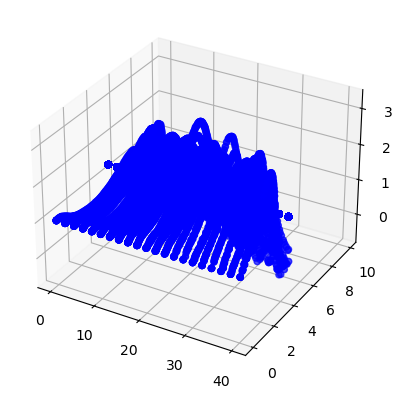

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare the data
horizontal_data = np.array(horizontal_data)
vertical_data = np.array(vertical_data)
TPA_data = np.array(TPA_data)

# Reshape the arrays if needed
horizontal_data = horizontal_data.reshape(-1, 1)
vertical_data = vertical_data.reshape(-1, 1)
TPA_data = TPA_data.reshape(-1, 1)

# Create polynomial features
poly_features_horizontal = PolynomialFeatures(degree=10)
horizontal_poly = poly_features_horizontal.fit_transform(horizontal_data)

poly_features_TPA = PolynomialFeatures(degree=2)
TPA_poly = poly_features_TPA.fit_transform(TPA_data)

# Combine the features
combined_poly_features = np.concatenate((horizontal_poly, TPA_poly), axis=1)

# Create polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(combined_poly_features, vertical_data)

# Generate predictions
horizontal_range = np.linspace(horizontal_data.min(), horizontal_data.max(), 100).reshape(-1, 1)
TPA_range = np.linspace(TPA_data.min(), TPA_data.max(), 100).reshape(-1, 1)
horizontal_range_poly = poly_features_horizontal.transform(horizontal_range)
TPA_range_poly = poly_features_TPA.transform(TPA_range)
combined_range_poly = np.concatenate((horizontal_range_poly, TPA_range_poly), axis=1)
vertical_predictions = poly_regression.predict(combined_range_poly)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(TPA_data, horizontal_data, vertical_data, c='b', label='Data Points')

# Plot the regression surface
TPA_range_grid, horizontal_range_grid = np.meshgrid(TPA_range, horizontal_range)
combined_range_grid = np.concatenate((horizontal_range_grid.reshape(-1, 1), TPA_range_grid.reshape(-1, 1)), axis=1)
vertical_range = poly_regression.predict(poly_features_horizontal.transform(combined_range_grid))
ax.plot_surface(TPA_range_grid, horizontal_range_grid, vertical_range.reshape(TPA_range_grid.shape), cmap='viridis', alpha=0.5, label='Regression Surface')

# Set labels and title
ax.set_xlabel('TPA')
ax.set_ylabel('Horizontal')
ax.set_zlabel('Vertical')
ax.set_title('Polynomial Regression')

# Add a legend
ax.legend()

# Show the plot
plt.show()



ValueError: X has 2 features, but PolynomialFeatures is expecting 1 features as input.

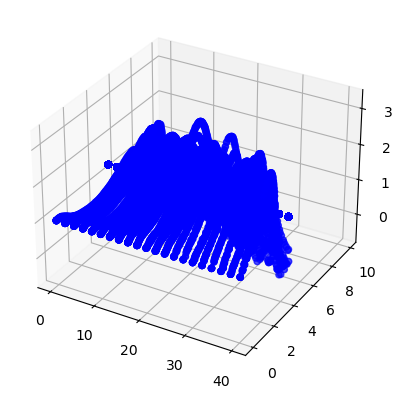

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Prepare the data
horizontal_data = np.array(horizontal_data)
vertical_data = np.array(vertical_data)
TPA_data = np.array(TPA_data)

combined_features = np.column_stack((horizontal_data, TPA_data))
poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(combined_features)


# Reshape the arrays if needed
horizontal_data = horizontal_data.reshape(-1, 1)
vertical_data = vertical_data.reshape(-1, 1)
TPA_data = TPA_data.reshape(-1, 1)

combined_features = np.concatenate((horizontal_data.reshape(-1, 1), TPA_data.reshape(-1, 1)), axis=1)
poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(combined_features)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
horizontal_data = imputer.fit_transform(horizontal_data)
vertical_data = imputer.fit_transform(vertical_data)
TPA_data = imputer.fit_transform(TPA_data)

# Create polynomial features
poly_features_horizontal = PolynomialFeatures(degree=10)
horizontal_poly = poly_features_horizontal.fit_transform(horizontal_data)

poly_features_TPA = PolynomialFeatures(degree=2)
TPA_poly = poly_features_TPA.fit_transform(TPA_data)

# Combine the features
combined_poly_features = np.concatenate((horizontal_poly, TPA_poly), axis=1)

# Create polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(combined_poly_features, vertical_data)

# Generate predictions
horizontal_range = np.linspace(horizontal_data.min(), horizontal_data.max(), 100).reshape(-1, 1)
TPA_range = np.linspace(TPA_data.min(), TPA_data.max(), 100).reshape(-1, 1)
horizontal_range_poly = poly_features_horizontal.transform(horizontal_range)
TPA_range_poly = poly_features_TPA.transform(TPA_range)
combined_range_poly = np.concatenate((horizontal_range_poly, TPA_range_poly), axis=1)
vertical_predictions = poly_regression.predict(combined_range_poly)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(TPA_data, horizontal_data, vertical_data, c='b', label='Data Points')

# Plot the regression surface
TPA_range_grid, horizontal_range_grid = np.meshgrid(TPA_range, horizontal_range)
combined_range_grid = np.concatenate((horizontal_range_grid.reshape(-1, 1), TPA_range_grid.reshape(-1, 1)), axis=1)
vertical_range = poly_regression.predict(poly_features_horizontal.transform(combined_range_grid))
ax.plot_surface(TPA_range_grid, horizontal_range_grid, vertical_range.reshape(TPA_range_grid.shape), cmap='viridis', alpha=0.5, label='Regression Surface')

# Set labels and title
ax.set_xlabel('TPA')
ax.set_ylabel('Horizontal')
ax.set_zlabel('Vertical')
ax.set_title('Polynomial Regression')

# Add a legend
ax.legend()

# Show the plot
plt.show()


Polynomial Regression Details:
------------------------------
Degree: 2
Intercept: [-0.17175564]
Coefficients: [[ 0.56829662  0.08172798 -0.05259388 -0.01259973 -0.00059212]]
R-squared: 0.3650628969867915


AttributeError: 'tuple' object has no attribute 'size'

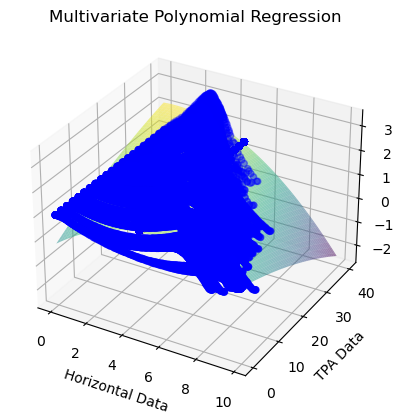

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Combine the features
combined_features = np.column_stack((horizontal_data, TPA_data))

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
combined_features_poly = poly_features.fit_transform(combined_features)

# Create the linear regression model
regression_model = LinearRegression()

# Fit the model to the data
regression_model.fit(combined_features_poly, vertical_data)

# Generate data for the 3D graph
horizontal_range = np.linspace(np.min(horizontal_data), np.max(horizontal_data), 100)
TPA_range = np.linspace(np.min(TPA_data), np.max(TPA_data), 100)
horizontal_range_grid, TPA_range_grid = np.meshgrid(horizontal_range, TPA_range)
combined_range_grid = np.column_stack((horizontal_range_grid.flatten(), TPA_range_grid.flatten()))
combined_range_grid_poly = poly_features.transform(combined_range_grid)
vertical_range = regression_model.predict(combined_range_grid_poly)
vertical_range_grid = vertical_range.reshape(horizontal_range_grid.shape)

# Calculate R-squared
predicted_vertical = regression_model.predict(combined_features_poly)
r2 = r2_score(vertical_data, predicted_vertical)

# Print regression details
print("Polynomial Regression Details:")
print("------------------------------")
print("Degree:", poly_features.degree)
print("Intercept:", regression_model.intercept_)
print("Coefficients:", regression_model.coef_)
print("R-squared:", r2)

# Plot the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(horizontal_data, TPA_data, vertical_data, color='blue', label='Actual Data')
ax.plot_surface(horizontal_range_grid, TPA_range_grid, vertical_range_grid, cmap='viridis', alpha=0.5, label='Regression Surface')

# Set labels and title
ax.set_xlabel('Horizontal Data')
ax.set_ylabel('TPA Data')
ax.set_zlabel('Vertical Data')
ax.set_title('Multivariate Polynomial Regression')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Combine the features
combined_features = np.column_stack((horizontal_data, TPA_data))

# Create polynomial features
poly_features = PolynomialFeatures(degree=4, include_bias=False)
combined_features_poly = poly_features.fit_transform(combined_features)

# Create the linear regression model
regression_model = LinearRegression()

# Fit the model to the data
regression_model.fit(combined_features_poly, vertical_data)

# Generate data for the 3D graph
horizontal_range = np.linspace(np.min(horizontal_data), np.max(horizontal_data), 100)
TPA_range = np.linspace(np.min(TPA_data), np.max(TPA_data), 100)
horizontal_range_grid, TPA_range_grid = np.meshgrid(horizontal_range, TPA_range)
combined_range_grid = np.column_stack((horizontal_range_grid.flatten(), TPA_range_grid.flatten()))
combined_range_grid_poly = poly_features.transform(combined_range_grid)
vertical_range = regression_model.predict(combined_range_grid_poly)
vertical_range_grid = vertical_range.reshape(horizontal_range_grid.shape)
ax.plot_surface(TPA_range_grid, horizontal_range_grid, vertical_range.reshape(TPA_range_grid.shape),
                cmap='viridis', alpha=0.5, rstride=5, cstride=5)
# Calculate R-squared
predicted_vertical = regression_model.predict(combined_features_poly)
r2 = r2_score(vertical_data, predicted_vertical)

# Print regression details
print("Polynomial Regression Details:")
print("------------------------------")
print("Degree:", poly_features.degree)
print("Intercept:", regression_model.intercept_)
print("Coefficients:", regression_model.coef_)
print("R-squared:", r2)

# Plot the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(horizontal_data, TPA_data, vertical_data, s=10, alpha=0.025, color='red', label='Actual Data')
ax.plot_surface(horizontal_range_grid, TPA_range_grid, vertical_range_grid, cmap='viridis', alpha=0.75, label='Regression Surface')

# Set labels and title
ax.set_xlabel('Horizontal Displacement/cm')
ax.set_ylabel('Initial Pitch Angle/Deg')
ax.set_zlabel('Vertical Displacement/cm')
ax.set_title('Predictive Model')
ax.set_zlim(0, 5)
ax.set_xlim(0,9)
ax.set_ylim(0,40)
ax.view_init(elev=25, azim=120)

# Show the plot
plt.show()



ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Reshape the data to match the required format for polynomial regression
X = np.column_stack((horizontal_data, TPA_data))

# Create polynomial features
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Create and fit the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly, vertical_data)

# Generate a range of values for prediction
horizontal_range = np.linspace(min(horizontal_data), max(horizontal_data), 100)
TPA_range = np.linspace(min(TPA_data), max(TPA_data), 100)
TPA_range_grid, horizontal_range_grid = np.meshgrid(TPA_range, horizontal_range)

# Flatten the grids for prediction
combined_range_grid = np.column_stack((horizontal_range_grid.ravel(), TPA_range_grid.ravel()))
combined_range_grid_poly = poly_features.transform(combined_range_grid)

# Perform the prediction
vertical_range = poly_regression.predict(combined_range_grid_poly)

# Clip the predicted values below 0
vertical_range = np.clip(vertical_range, 0, None)

# Reshape the predicted values to match the grid shape
vertical_range = vertical_range.reshape(horizontal_range_grid.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(horizontal_data, TPA_data, vertical_data, color='red', alpha=0.05, s=1, label='Actual Data')

# Plot the regression surface
ax.plot_surface(horizontal_range_grid, TPA_range_grid, vertical_range, cmap='viridis', alpha=0.5, label='Regression Surface')
# Print regression details
print("Polynomial Regression Details:")
print("------------------------------")
print("Degree:", poly_features.degree)
print("Intercept:", regression_model.intercept_)
print("Coefficients:", regression_model.coef_)
print("R-squared:", r2)
# Set labels and title
ax.set_xlabel('Horizontal Displacement/m')
ax.set_ylabel('Initial Pitch Angle/')
ax.set_zlabel('Vertical Displacement/cm')
ax.set_title('Multivariate Polynomial Regression')
ax.view_init(elev=15, azim=300)


# Show the plot
plt.show()


ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

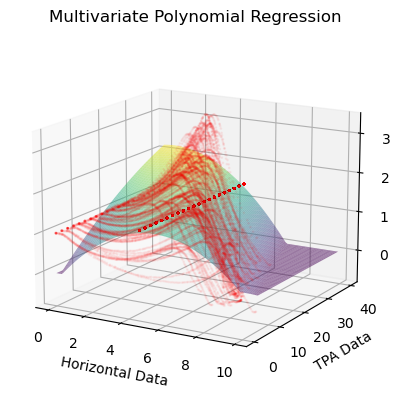

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Remove rows with missing horizontal or vertical data
data = np.column_stack((horizontal_data, TPA_data, vertical_data))
data = data[~np.isnan(data).any(axis=1)]
horizontal_data = data[:, 0]
TPA_data = data[:, 1]
vertical_data = data[:, 2]

# Reshape the data to match the required format for polynomial regression
X = np.column_stack((horizontal_data, TPA_data))

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Create and fit the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly, vertical_data)

# Generate a range of values for prediction
horizontal_range = np.linspace(min(horizontal_data), max(horizontal_data), 100)
TPA_range = np.linspace(min(TPA_data), max(TPA_data), 100)
TPA_range_grid, horizontal_range_grid = np.meshgrid(TPA_range, horizontal_range)

# Flatten the grids for prediction
combined_range_grid = np.column_stack((horizontal_range_grid.ravel(), TPA_range_grid.ravel()))
combined_range_grid_poly = poly_features.transform(combined_range_grid)

# Perform the prediction
vertical_range = poly_regression.predict(combined_range_grid_poly)

# Clip the predicted values below 0
vertical_range = np.clip(vertical_range, 0, None)

# Reshape the predicted values to match the grid shape
vertical_range = vertical_range.reshape(horizontal_range_grid.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(horizontal_data, TPA_data, vertical_data, color='red', alpha=0.05, s=1, label='Actual Data')

# Plot the regression surface
ax.plot_surface(horizontal_range_grid, TPA_range_grid, vertical_range, cmap='viridis', alpha=0.5, edgecolor='none', label='Regression Surface')

# Set labels and title
ax.set_xlabel('Horizontal Data')
ax.set_ylabel('TPA Data')
ax.set_zlabel('Vertical Data')
ax.set_title('Multivariate Polynomial Regression')
ax.view_init(elev=15, azim=300)




# Show the plot
plt.show()


In [274]:
import numpy as np

# Find indices of rows with non-empty data in both horizontal_data and vertical_data
valid_indices = np.where(np.logical_and(~np.isnan(horizontal_data), ~np.isnan(vertical_data),~np.isnan(TPA_data)))[0]
# Filter the data arrays using the valid indices
horizontal_data_filtered = horizontal_data[valid_indices]
vertical_data_filtered = vertical_data[valid_indices]
TPA_data_filtered = TPA_data[valid_indices]

# Save the filtered data to a CSV file
output_file = 'filtered5_data.csv'
np.savetxt(output_file, np.column_stack((horizontal_data_filtered, vertical_data_filtered,TPA_data_filtered)), delimiter=',', header='Horizontal,Vertical,TPA', comments='')

print(f"Filtered data successfully saved to {output_file}.")

Filtered data successfully saved to filtered5_data.csv.


In [275]:
FixedData=pd.read_csv('filtered5_data.csv')

In [276]:
Hor = FixedData.Horizontal

In [277]:
TPA = FixedData.TPA

In [278]:
Ver = FixedData.Vertical

In [23]:
YDistance = []
XDistance = []
PitchAngle = []

for i in range(len(horizontal_data)):
    if horizontal_data[i].size != 0:
        YDistance.append(vertical_data[i])
        XDistance.append(horizontal_data[i])
        PitchAngle.append(TPA_data[i])

Polynomial Regression Details:
------------------------------
Degree: 4


NameError: name 'regression_model' is not defined

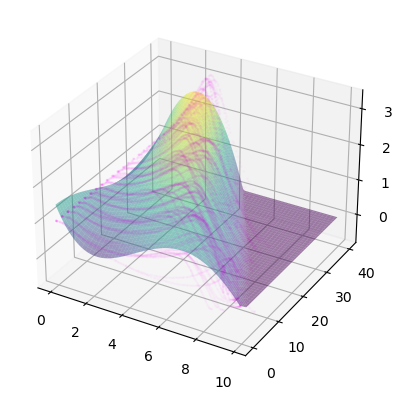

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Remove rows with missing horizontal or vertical values
valid_indices = ~np.isnan(horizontal_data) & ~np.isnan(vertical_data) & ~np.isnan(TPA_data)
horizontal_data = horizontal_data[valid_indices]
vertical_data = vertical_data[valid_indices]
TPA_data = TPA_data[valid_indices]

# Reshape the data to match the required format for polynomial regression
X = np.column_stack((horizontal_data, TPA_data))

# Create polynomial features
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Create and fit the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly, vertical_data)

# Generate a range of values for prediction
horizontal_range = np.linspace(min(horizontal_data), max(horizontal_data), 100)
TPA_range = np.linspace(min(TPA_data), max(TPA_data), 100)
TPA_range_grid, horizontal_range_grid = np.meshgrid(TPA_range, horizontal_range)

# Flatten the grids for prediction
combined_range_grid = np.column_stack((horizontal_range_grid.ravel(), TPA_range_grid.ravel()))
combined_range_grid_poly = poly_features.transform(combined_range_grid)

# Perform the prediction
vertical_range = poly_regression.predict(combined_range_grid_poly)

# Clip the predicted values below 0
vertical_range = np.clip(vertical_range, 0, None)

# Reshape the predicted values to match the grid shape
vertical_range = vertical_range.reshape(horizontal_range_grid.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(horizontal_data, TPA_data, vertical_data, color='magenta', alpha=0.02, s=1, label='Actual Data')

# Plot the regression surface
ax.plot_surface(horizontal_range_grid, TPA_range_grid, vertical_range, cmap='viridis', alpha=0.5, label='Regression Surface')
# Print regression details
print("Polynomial Regression Details:")
print("------------------------------")
print("Degree:", poly_features.degree)
print("Intercept:", regression_model.intercept_)
print("Coefficients:", regression_model.coef_)
print("R-squared:", r2)
# Set labels and title
ax.set_xlabel('Horizontal Displacement/m')
ax.set_ylabel('Launch Angle')
ax.set_zlabel('Vertical Displacement/m')
ax.set_title('Predictive Model')
ax.view_init(elev=15, azim=295)
# Create a 3D plot with gray background

# Show the plot
plt.show()

In [304]:
TrueData=pd.read_csv('Truedata - data13.csv')

In [309]:
horizontal_data = TrueData.Horizontal

In [308]:
vertical_data=TrueData.Vertical

In [310]:
TPA_data=TrueData.TPA

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Remove rows with missing horizontal or vertical values
valid_indices = ~np.isnan(horizontal_data) & ~np.isnan(vertical_data) & ~np.isnan(TPA_data)
horizontal_data = horizontal_data[valid_indices]
vertical_data = vertical_data[valid_indices]
TPA_data = TPA_data[valid_indices]

# Reshape the data to match the required format for polynomial regression
X = np.column_stack((horizontal_data, TPA_data))

# Create polynomial features
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Create and fit the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly, vertical_data)

# Generate a range of values for prediction
horizontal_range = np.linspace(min(horizontal_data), max(horizontal_data), 100)
TPA_range = np.linspace(min(TPA_data), max(TPA_data), 100)
TPA_range_grid, horizontal_range_grid = np.meshgrid(TPA_range, horizontal_range)

# Flatten the grids for prediction
combined_range_grid = np.column_stack((horizontal_range_grid.ravel(), TPA_range_grid.ravel()))
combined_range_grid_poly = poly_features.transform(combined_range_grid)

# Perform the prediction
vertical_range = poly_regression.predict(combined_range_grid_poly)

# Clip the predicted values below 0
vertical_range = np.clip(vertical_range, 0, None)

# Reshape the predicted values to match the grid shape
vertical_range = vertical_range.reshape(horizontal_range_grid.shape)

# Create a 3D plot with black background
fig = plt.figure(facecolor='gray')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('gray')

# Plot the actual data points
scatter = ax.scatter(horizontal_data, TPA_data, vertical_data, color='magenta', alpha=0.02, s=1, label='Actual Data')

# Plot the regression surface
surface = ax.plot_surface(horizontal_range_grid, TPA_range_grid, vertical_range, cmap='viridis', alpha=0.5, label='Regression Surface')

# Set labels and title
ax.set_xlabel('Horizontal Displacement/m')
ax.set_ylabel('Launch Angle')
ax.set_zlabel('Vertical Displacement/m')
ax.set_title('Predictive Model')
ax.view_init(elev=15, azim=295)

# Create colorbar
cbar = fig.colorbar(surface, ax=ax)
cbar.set_label('Vertical Displacement/m')

# Create legend
ax.legend([scatter, surface], ['Actual Data', 'Regression Surface'])

# Show the plot
plt.show()


NameError: name 'horizontal_data' is not defined

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Remove rows with missing horizontal or vertical values
valid_indices = ~np.isnan(horizontal_data) & ~np.isnan(vertical_data) & ~np.isnan(TPA_data)
horizontal_data = horizontal_data[valid_indices]
vertical_data = vertical_data[valid_indices]
TPA_data = TPA_data[valid_indices]

# Reshape the data to match the required format for polynomial regression
X = np.column_stack((horizontal_data, TPA_data))

# Create polynomial features
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Create and fit the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly, vertical_data)

# Generate a range of values for prediction
horizontal_range = np.linspace(min(horizontal_data), max(horizontal_data), 100)
TPA_range = np.linspace(min(TPA_data), max(TPA_data), 100)
TPA_range_grid, horizontal_range_grid = np.meshgrid(TPA_range, horizontal_range)

# Flatten the grids for prediction
combined_range_grid = np.column_stack((horizontal_range_grid.ravel(), TPA_range_grid.ravel()))
combined_range_grid_poly = poly_features.transform(combined_range_grid)

# Perform the prediction
vertical_range = poly_regression.predict(combined_range_grid_poly)

# Clip the predicted values below 0
vertical_range = np.clip(vertical_range, 0, None)

# Reshape the predicted values to match the grid shape
vertical_range = vertical_range.reshape(horizontal_range_grid.shape)

# Create a 3D plot with gray background
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')

# Plot the actual data points
scatter = ax.scatter(horizontal_data, TPA_data, vertical_data, color='brown', alpha=1, s=0.01, label='Actual Data')

# Plot the regression surface
surface = ax.plot_surface(horizontal_range_grid, TPA_range_grid, vertical_range, cmap='plasma', alpha=1
                          , label='Regression Surface')
#Sequential colormaps:

#'viridis''plasma''inferno''magma''cividis' Diverging colormaps:'PiYG''PRGn'
#'BrBG''PuOr''RdGy'Qualitative colormaps:'Pastel1''Pastel2''Paired''Accent'
#'Dark2'Miscellaneous colormaps:'jet''rainbow''cool''hot''gray'
# Set labels and title
ax.set_xlabel('Horizontal Displacement/m')
ax.set_ylabel('Initial Pitch Angle')
ax.set_zlabel('Height/m')
ax.set_title('Predictive Model')
ax.view_init(elev=15, azim=270)
#ax.view_init(elev=15, azim=270)

# Adjust gridlines
ax.xaxis._axinfo["grid"]['color'] = 'gray'
ax.yaxis._axinfo["grid"]['color'] = 'gray'
ax.zaxis._axinfo["grid"]['color'] = 'gray'

# Create colorbar
cbar = fig.colorbar(surface, ax=ax, pad=0.1)
cbar.set_label('Height (m) Colour Bar')
import numpy as np
import plotly.graph_objects as go
# Calculate the residuals
residuals = vertical_data - poly_regression.predict(X_poly)

# Calculate the mean squared error
mse = np.mean(residuals**2)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Print the standard error of estimation (RMSE)
print("Standard Error of Estimation (RMSE):", rmse)

# Show the plot
plt.show()


NameError: name 'horizontal_data' is not defined

In [518]:
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# ... (previous code remains the same) ...

# Create the 3D scatter plot for the actual data points
scatter_data = go.Scatter3d(
    x=horizontal_data,
    y=TPA_data,
    z=vertical_data,
    mode='markers',
    marker=dict(
        size=1,
        color='brown',
        opacity=0.1
    ),
    name='Actual Data'
)

# Create the 3D surface plot for the regression surface
surface_data = go.Surface(
    x=horizontal_range_grid,
    y=TPA_range_grid,
    z=vertical_range,
    colorscale='plasma',
    opacity=0.7,
    showscale=False
)

# Create the layout
layout = go.Layout(
    title='Predictive Model',
    scene=dict(
        xaxis=dict(title='Horizontal Distance/m'),
        yaxis=dict(title='Initial Pitch Angle'),
        zaxis=dict(title='Height/m'),
        aspectratio=dict(x=1, y=1, z=0.8),
        camera=dict(eye=dict(x=-1.5, y=-1.5, z=0.5)),
    ),
    scene=dict(
        xaxis=dict(gridcolor='black'),
        yaxis=dict(gridcolor='black'),
        zaxis=dict(gridcolor='black'),
    )
)

# Create the figure
fig = go.Figure(data=[scatter_data, surface_data], layout=layout)

# Show the plot
fig.show()


SyntaxError: keyword argument repeated: scene (1370469071.py, line 42)

In [589]:
len(horizontal_data)

13363

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats import t

# Remove rows with missing horizontal or vertical values
valid_indices = ~np.isnan(horizontal_data) & ~np.isnan(vertical_data) & ~np.isnan(TPA_data)
horizontal_data = horizontal_data[valid_indices]
vertical_data = vertical_data[valid_indices]
TPA_data = TPA_data[valid_indices]

# Reshape the data to match the required format for polynomial regression
X = np.column_stack((horizontal_data, TPA_data))

# Create polynomial features
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Create and fit the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly, vertical_data)

# Generate a range of values for prediction
horizontal_range = np.linspace(min(horizontal_data), max(horizontal_data), 100)
TPA_range = np.linspace(min(TPA_data), max(TPA_data), 100)
TPA_range_grid, horizontal_range_grid = np.meshgrid(TPA_range, horizontal_range)

# Flatten the grids for prediction
combined_range_grid = np.column_stack((horizontal_range_grid.ravel(), TPA_range_grid.ravel()))
combined_range_grid_poly = poly_features.transform(combined_range_grid)

# Perform the prediction
vertical_range = poly_regression.predict(combined_range_grid_poly)

# Compute confidence intervals for the polynomial regression coefficients
n = len(horizontal_data)
p = poly_features.get_feature_names().index('x4')
y_hat = poly_regression.predict(X_poly)
residuals = vertical_data - y_hat
MSE = np.sum(residuals ** 2) / (n - p - 1)
X_inv = np.linalg.inv(np.dot(X_poly.T, X_poly))
coeff_std_errs = np.sqrt(np.diagonal(MSE * X_inv))

# Compute t-value for desired confidence level
alpha = 0.05  # 95% confidence level
t_value = t.ppf(1 - alpha / 2, df=n - p - 1)

# Compute confidence intervals
coefficients = poly_regression.coef_
lower_bounds = coefficients - t_value * coeff_std_errs
upper_bounds = coefficients + t_value * coeff_std_errs

# Reshape the predicted values to match the grid shape
vertical_range = vertical_range.reshape(horizontal_range_grid.shape)

# Create a 3D plot with gray background
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')

# Plot the actual data points
scatter = ax.scatter(horizontal_data, TPA_data, vertical_data, color='brown', alpha=0.05, s=1, label='Actual Data')

# Plot the regression surface
surface = ax.plot_surface(horizontal_range_grid, TPA_range_grid, vertical_range, cmap='plasma', alpha=0.65, label='Regression Surface')

# Plot confidence intervals
for i, coeff in enumerate(poly_regression.coef_):
    lower_bound = lower_bounds[i]
    upper_bound = upper_bounds[i]
    ax.plot([min(horizontal_data), max(horizontal_data)], [min(TPA_data), max(TPA_data)], [lower_bound, lower_bound], color='blue', linestyle='--', linewidth=1)
    ax.plot([min(horizontal_data), max(horizontal_data)], [min(TPA_data), max(TPA_data)], [upper_bound, upper_bound], color='blue', linestyle='--', linewidth=1)

# Set labels and title
ax.set_xlabel('Horizontal Distance/m')
ax.set_ylabel('Initial Pitch Angle')
ax.set_title('Predictive Model')
ax.view_init(elev=20, azim=270)
# Calculate the standard error of estimation
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Calculate R-squared
r2 = r2_score(y, y_pred)
# Create colorbar
cbar = fig.colorbar(surface, ax=ax, pad=0.1)
cbar.set_label('Height/m')

# Show the plot
plt.show()

NameError: name 'horizontal_data' is not defined

In [606]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate some sample data
np.random.seed(0)
X = np.linspace(-10, 10, 100)
y = 2*X**2 + 3*X + 5 + np.random.normal(0, 10, 100)

# Reshape the data
X = X.reshape(-1, 1)

# Create polynomial features
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Create and fit the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y)

# Perform the prediction
y_pred = poly_regression.predict(X_poly)

# Calculate the standard error of estimation
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Print regression details
print("Polynomial Regression Details:")
print("-----------------------------")
print("Degree:", poly_features.degree)
print("Intercept:", poly_regression.intercept_)
print("Coefficients:", poly_regression.coef_)
print("Standard Error of Estimation (RMSE):", rmse)
print("R-squared:", r2)


Polynomial Regression Details:
-----------------------------
Degree: 4
Intercept: 1.3371164782828089
Coefficients: [0.00000000e+00 2.80327381e+00 2.11548571e+00 7.85288382e-04
 1.60315339e-04]
Standard Error of Estimation (RMSE): 9.235226537245495
R-squared: 0.9812795854855109


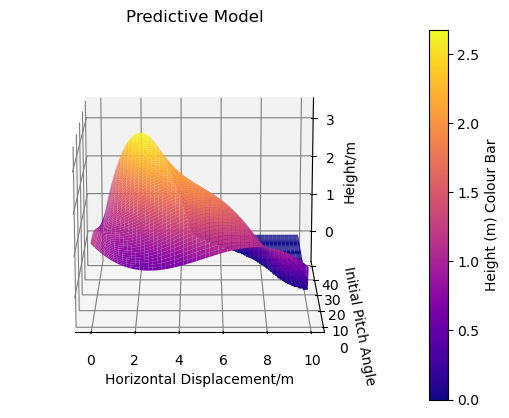

In [627]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import SmoothBivariateSpline

# Remove rows with missing horizontal or vertical values
valid_indices = ~np.isnan(horizontal_data) & ~np.isnan(vertical_data) & ~np.isnan(TPA_data)
horizontal_data = horizontal_data[valid_indices]
vertical_data = vertical_data[valid_indices]
TPA_data = TPA_data[valid_indices]

# Create a spline regression model
spline_model = SmoothBivariateSpline(horizontal_data, TPA_data, vertical_data)

# Generate a range of values for prediction
horizontal_range = np.linspace(min(horizontal_data), max(horizontal_data), 100)
TPA_range = np.linspace(min(TPA_data), max(TPA_data), 100)
TPA_range_grid, horizontal_range_grid = np.meshgrid(TPA_range, horizontal_range)

# Perform the prediction using spline regression
vertical_range = spline_model.ev(horizontal_range_grid, TPA_range_grid)

# Clip the predicted values below 0
vertical_range = np.clip(vertical_range, 0, None)

# Create a 3D plot with gray background
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')

# Plot the actual data points
scatter = ax.scatter(horizontal_data, TPA_data, vertical_data, color='brown', alpha=0, s=0.01, label='Actual Data')

# Plot the regression surface
surface = ax.plot_surface(horizontal_range_grid, TPA_range_grid, vertical_range, cmap='plasma', alpha=1, label='Regression Surface')

# Set labels and title
ax.set_xlabel('Horizontal Displacement/m')
ax.set_ylabel('Initial Pitch Angle')
ax.set_zlabel('Height/m')
ax.set_title('Predictive Model')
ax.view_init(elev=15, azim=270)

# Adjust gridlines
ax.xaxis._axinfo["grid"]['color'] = 'gray'
ax.yaxis._axinfo["grid"]['color'] = 'gray'
ax.zaxis._axinfo["grid"]['color'] = 'gray'

# Create colorbar
cbar = fig.colorbar(surface, ax=ax, pad=0.1)
cbar.set_label('Height (m) Colour Bar')

# Show the plot
plt.show()


C:\Users\William Chang\AppData\Local\Temp\ipykernel_10264\2652761996.py:50: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))  # Color the x-axis plane gray
C:\Users\William Chang\AppData\Local\Temp\ipykernel_10264\2652761996.py:51: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))  # Color the y-axis plane gray
C:\Users\William Chang\AppData\Local\Temp\ipykernel_10264\2652761996.py:52: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))  # Color the z-axis plane gray


R-squared: 0.6403404854703268


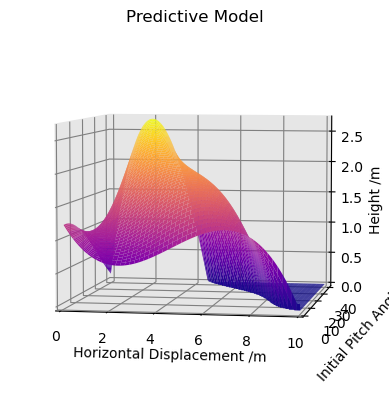

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import SmoothBivariateSpline

# Remove rows with missing horizontal or vertical values
valid_indices = ~np.isnan(horizontal_data) & ~np.isnan(vertical_data) & ~np.isnan(TPA_data)
horizontal_data = horizontal_data[valid_indices]
vertical_data = vertical_data[valid_indices]
TPA_data = TPA_data[valid_indices]

# Create a spline regression model
spline_model = SmoothBivariateSpline(horizontal_data, TPA_data, vertical_data)

# Generate a range of values for prediction
horizontal_range = np.linspace(min(horizontal_data), 10, 200)  # Adjust the maximum value and the number of points
TPA_range = np.linspace(1.5, 40, 100)
TPA_range_grid, horizontal_range_grid = np.meshgrid(TPA_range, horizontal_range)

# Perform the prediction using spline regression
vertical_range = spline_model.ev(horizontal_range_grid, TPA_range_grid)

# Clip the predicted values below 0
vertical_range = np.clip(vertical_range, 0, None)

# Create a 3D plot with gray background
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')

# Plot the actual data points
#scatter = ax.scatter(horizontal_data, TPA_data, vertical_data, color='brown', alpha=1, s=0.01, label='Actual Data')

# Plot the regression surface
surface = ax.plot_surface(horizontal_range_grid, TPA_range_grid, vertical_range, cmap='plasma', alpha=1, label='Regression Surface')

# Set labels and title
ax.set_xlabel('Horizontal Displacement /m')
ax.set_ylabel('Initial Pitch Angle')
ax.set_zlabel('Height /m')
ax.set_title('Predictive Model')
ax.view_init(elev=5, azim=280)

# Adjust gridlines
ax.xaxis._axinfo["grid"]['color'] = 'gray'
ax.yaxis._axinfo["grid"]['color'] = 'gray'
ax.zaxis._axinfo["grid"]['color'] = 'gray'

ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))  # Color the x-axis plane gray
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))  # Color the y-axis plane gray
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))  # Color the z-axis plane gray


# Set the desired range for the x-axis, y-axis, and z-axis
x_range = [0, 10]  # Specify the minimum and maximum values for the x-axis
y_range = [0, 40]  # Specify the minimum and maximum values for the y-axis
z_range = [0, 4]  # Specify the minimum and maximum values for the z-axis

# Adjust the x-axis, y-axis, and z-axis ranges
ax.set_xlim(x_range)
#ax.set_ylim(y_range)
#ax.set_zlim(z_range)

# Create colorbar
#cbar = fig.colorbar(surface, ax=ax, pad=0.1)
#cbar.set_label('Height /m')

# Calculate the R-squared
residuals = vertical_data - spline_model.ev(horizontal_data, TPA_data)
sst = np.sum((vertical_data - np.mean(vertical_data))**2)
ssr = np.sum(residuals**2)
r_squared = 1 - (ssr / sst)
print("R-squared:", r_squared)

# Get the coefficients of the spline regression
coefficients = spline_model.get_coeffs



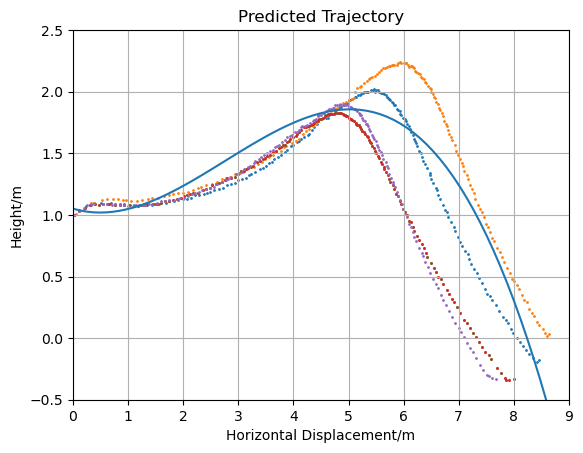

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import SmoothBivariateSpline

# Remove rows with missing horizontal or vertical values
valid_indices = ~np.isnan(horizontal_data) & ~np.isnan(vertical_data) & ~np.isnan(TPA_data)
horizontal_data = horizontal_data[valid_indices]
vertical_data = vertical_data[valid_indices]
TPA_data = TPA_data[valid_indices]

# Create a spline regression model
spline_model = SmoothBivariateSpline(horizontal_data, TPA_data, vertical_data)

# Generate a range of values for prediction
horizontal_range = np.linspace(min(horizontal_data), 12, 100)
TPA_range = np.linspace(min(TPA_data), max(TPA_data), 100)
TPA_range_grid, horizontal_range_grid = np.meshgrid(TPA_range, horizontal_range)

# Perform the prediction using spline regression
vertical_range = spline_model.ev(horizontal_range_grid, TPA_range_grid)

# Clip the predicted values below 0
vertical_range = np.clip(vertical_range, 0, None)

# Create a line graph for the predicted trajectory
angle_of_launch = 14
initial_height = 1
#
# Calculate the corresponding horizontal and vertical values
horizontal_values = np.linspace(min(horizontal_data), 12, 100) 
TPA_values = np.full_like(horizontal_values, angle_of_launch) 
vertical_values = spline_model.ev(horizontal_values, TPA_values) + initial_height - 1

# Set the range for the x and y axes
x_range = (0,9)
y_range = (-0.5, 2.5)

# Plot the predicted trajectory
plt.plot(horizontal_values, vertical_values)
plt.xlabel('Horizontal Displacement/m')
plt.ylabel('Height/m')
plt.title('Predicted Trajectory')
plt.grid(True)

# Set the x and y axis limits
plt.xlim(x_range)
plt.ylim(y_range)


plt.scatter(VJCData.Horizontal14_1,VJCData.Vertical14_1,s=1)
plt.scatter(VJCData.Horizontal14_2,VJCData.Vertical14_2,s=1)
plt.scatter(VJCData.Horizontal14_3,VJCData.Vertical14_3,s=1)
plt.scatter(VJCData.Horizontal14_4,VJCData.Vertical14_4,s=1)
plt.scatter(VJCData.Horizontal14_5,VJCData.Vertical14_5,s=1)

# Show the plot
plt.show()



C:\Users\William Chang\AppData\Local\Temp\ipykernel_12708\587415854.py:28: RuntimeWarning:

overflow encountered in double_scalars



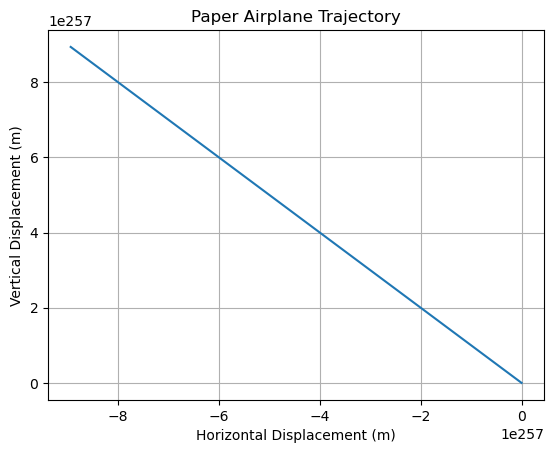

In [832]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial parameters
thrust_force = 7.6  # N
weight = 6.82 * 0.001 * 9.8  # Convert weight from grams to N
lift_coefficient = 1.5
drag_coefficient = 1.5
pitch_angle = 20  # degrees

# Simulation settings
time_step = 0.01  # seconds
total_time = 10  # seconds

# Convert pitch angle to radians
pitch_angle_rad = np.radians(pitch_angle)

# Initialize variables
time = np.arange(0, total_time, time_step)
position_x = np.zeros_like(time)
position_y = np.zeros_like(time)
velocity_x = np.zeros_like(time)
velocity_y = np.zeros_like(time)

# Simulation loop
for i in range(1, len(time)):
    # Calculate forces
    velocity = np.sqrt(velocity_x[i-1]**2 + velocity_y[i-1]**2)
    drag_force = drag_coefficient * velocity**2
    lift_force = lift_coefficient * velocity**2

    # Calculate acceleration
    acceleration_x = (thrust_force * np.sin(pitch_angle_rad) - drag_force) / weight
    acceleration_y = (lift_force - weight * np.cos(pitch_angle_rad)) / weight

    # Update velocity
    velocity_x[i] = velocity_x[i-1] + acceleration_x * time_step
    velocity_y[i] = velocity_y[i-1] + acceleration_y * time_step

    # Update position
    position_x[i] = position_x[i-1] + velocity_x[i] * time_step
    position_y[i] = position_y[i-1] + velocity_y[i] * time_step

# Plot the trajectory
plt.plot(position_x, position_y)
plt.xlabel('Horizontal Displacement (m)')
plt.ylabel('Vertical Displacement (m)')
plt.title('Paper Airplane Trajectory')
plt.grid(True)
plt.show()


In [5]:
print(VJCData.Horizontal)

0      991.00
1      966.00
2      968.00
3      928.00
4      987.00
        ...  
271       NaN
272       NaN
273       NaN
274       NaN
275       NaN
Name: Horizontal, Length: 276, dtype: object
